<a href="https://colab.research.google.com/github/lcaffe/tech-challenge/blob/main/Otimizacao_Transporte_Cargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 2 (Grupo 40)

**FIAP - Pos Tech - IA para DEVs**

**Professora:** SÉRGIO POLIMANTE SOUTO

**Alunos:**

- Claiton Aparecido Pereira  - RM355839
- Eduardo Pedrosa Cajueiro   - RM355819
- Hiomone Oliveira Rodrigues - RM356011
- Leonardo Lima Ferreira     - RM355721
- Thiago Silva Cerqueira     - RM355830

#Otimização de Entregas para Motoboys utilizando Algoritmos Genéticos

## Definição do Problema

A logística de entregas é um desafio significativo para empresas que dependem de motoboys para a distribuição de mercadorias. O objetivo deste projeto é otimizar as entregas de um motoboy para maximizar o lucro, considerando as seguintes restrições:

**Capacidade de carga do motoboy:** Cada motoboy tem um limite máximo de carga que pode transportar.

**Distância das entregas:** A distância percorrida afeta diretamente o custo de combustível e o tempo necessário para a entrega.

**Custo do combustível e do tempo:** O custo total de uma entrega inclui o custo do combustível e o tempo gasto.
Para solucionar este problema, utilizamos um algoritmo genético, uma técnica de otimização inspirada no processo de seleção natural. O algoritmo genético é adequado para problemas onde a busca pelo melhor resultado envolve explorar um grande espaço de soluções possíveis.

## Detalhes da Implementação do Algoritmo

**Estrutura do Algoritmo
Inicialização:** Criar uma população inicial de cromossomos, onde cada cromossomo representa uma solução potencial. Um cromossomo é uma sequência binária que indica quais entregas serão realizadas pelo motoboy (1 para selecionada, 0 para não selecionada). Exemplo: ["0100110001"]

**Avaliação da Aptidão (Fitness):** Calcular o valor de aptidão para cada cromossomo, que é uma medida de quão boa é a solução. A função de fitness considera o lucro total das entregas selecionadas, subtraindo os custos de combustível, tempo e penalidades por excesso de carga ou distância.

**Seleção:** Utilizar a seleção por torneio para escolher os cromossomos que serão pais da próxima geração. Este método envolve selecionar aleatoriamente um grupo de cromossomos e escolher o melhor entre eles.

**Crossover (Recombinação):** Combinar pares de cromossomos pais para criar novos cromossomos filhos. A recombinação é feita em um ponto de corte aleatório.

**Mutação:** Introduzir pequenas alterações aleatórias nos cromossomos filhos para manter a diversidade genética da população.

**Elitismo:** Garantir que uma porcentagem dos melhores cromossomos da geração atual seja diretamente copiada para a próxima geração para preservar soluções de alta qualidade.
Iteração: Repetir os passos de avaliação, seleção, crossover, mutação e elitismo por um número fixo de gerações.


Fizemos ainda a opção por testar vários parâmtros de entrada utilizando a biblioteca _Optuma_ para encontrar o melhor _fitness_ para o estudo de caso.

 A biblioteca _Optuma_ é uma ferramenta poderosa para a otimização de hiperparâmetros e de qualquer tipo de parâmetro em algoritmos de aprendizado de máquina e outros problemas de otimização. Ela permite que você encontre automaticamente os melhores valores para os parâmetros do seu modelo ou sistema.

### Conceitos Fundamentais
**Estudo (Study):** Um estudo é uma coleção de tentativas de otimização. Ele armazena o histórico das execuções e seus resultados.

**Tentativa (Trial):** Uma tentativa representa uma execução única da função objetivo com um conjunto específico de parâmetros.

**Espaço de Busca (Search Space):** É o conjunto de todos os valores possíveis que os hiperparâmetros podem assumir.

### Funcionamento Básico

**Definição da Função Objetivo:** Você deve definir uma função que recebe um conjunto de parâmetros e retorna um valor a ser otimizado (minimizado ou maximizado). Este valor é o "objetivo" da otimização.

**Configuração do Espaço de Busca:** Especificar os parâmetros a serem otimizados e seus respectivos intervalos de valores possíveis.

**Execução da Otimização:** Utilizar o Optuna para executar a otimização e encontrar os melhores parâmetros.

# Fluxograma do algoritmo genético

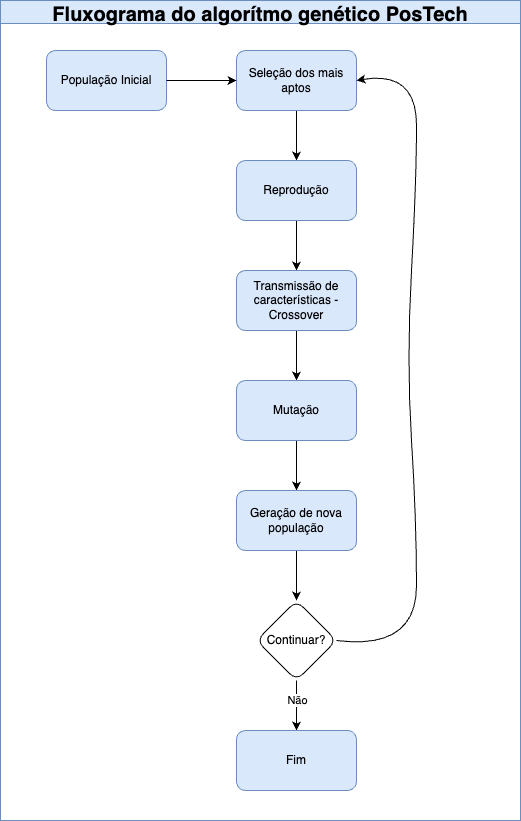

## Instalação da optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [1]:
from AlgoritmoGeneticoPosTechOriginal import *
import pandas as pd
import optuna

class MotoBoy(AlgoritmoGeneticoPosTech):
    def __init__(self, p, g, m, e):
        super().__init__(p, g, m, e)

        self.itens = [
            ["Celular", 0.000899, 15, 5],
            ["Notebook", 0.00350, 18, 10],
            ["Furadeira", 0.06075, 9, 8],
            ["Carteira Masculina", 0.00008, 4, 3],
            ["Livro", 0.00095, 5, 2],
            ["Vídeo Game", 0.050635, 18, 7],
            ["Almofada Couro", 0.0225, 5, 4],
            ["Liquidificador", 0.03125, 9, 6],
            ["Jogo de Pratos", 0.072, 12, 9],
            ["Anel de Ouro", 0.000048, 19, 1]
        ]

        self.espacoBau = 0.162
        self.populacao = None  # Inicializa a população como None

    def fitness(self, cromossomo):
        genes = self.leituraDeValores(cromossomo, 1)

        pagamentoAcumulado = 0
        espacoAcumulado = 0
        distanciaAcumulada = 0

        for i in range(len(self.itens)):
            if genes[i] == "1":
                pagamentoAcumulado += self.itens[i][2]
                espacoAcumulado += self.itens[i][1]
                distanciaAcumulada += self.itens[i][3]

        # Suposição: o custo do combustível é proporcional à distância e ao espaço ocupado no baú
        custo_combustivel = distanciaAcumulada * espacoAcumulado

        if espacoAcumulado > self.espacoBau:
            nota = 1 / espacoAcumulado  # Penalidade por exceder o espaço do baú
        else:
            nota = pagamentoAcumulado - custo_combustivel  # Maximizar lucro líquido

        return [cromossomo, nota]

    def runAG(self, iteracoes):
        super().runAG(iteracoes)
        self.populacao = self.getPopulacao()  # Armazena a população após a execução

    def getPopulacao(self):
        # Implemente este método para retornar a população atual
        return self.populacao

    def getItensEscolhidos(self, cromossomo):
        genes = self.leituraDeValores(cromossomo, 1)
        itens_escolhidos = [self.itens[i] for i in range(len(genes)) if genes[i] == "1"]
        return itens_escolhidos

# Função de objetivo para otimização
def objective(trial):
    # Sugerir valores para os parâmetros
    p = trial.suggest_int('p', 50, 200)       # Tamanho da população
    g = trial.suggest_int('g', 10, 10)        # Número de gerações
    m = trial.suggest_float('m', 0.01, 0.3)   # Taxa de mutação
    e = trial.suggest_float('e', 0.01, 0.3)   # Taxa de elitismo

    agmotoboy = MotoBoy(p, g, m, e)
    agmotoboy.runAG(100)
    melhor_individuo = agmotoboy.getMelhorIndividuo(agmotoboy.getPopulacao())

    # Retornar o valor da função de fitness do melhor indivíduo
    return melhor_individuo[1]

# Criar estudo e otimizar
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Melhor conjunto de hiperparâmetros
best_params = study.best_params
print("Melhores parâmetros: ", best_params)

# Executar com os melhores parâmetros encontrados
agmotoboy = MotoBoy(best_params['p'], best_params['g'], best_params['m'], best_params['e'])
agmotoboy.runAG(100)
melhor_individuo = agmotoboy.getMelhorIndividuo(agmotoboy.getPopulacao())

# Obter itens escolhidos a partir do cromossomo do melhor indivíduo
itens_escolhidos = agmotoboy.getItensEscolhidos(melhor_individuo[0])

# Criar DataFrame com os itens escolhidos
df = pd.DataFrame(itens_escolhidos, columns=["Nome", "Tamanho", "Valor do Frete", "Distância"])

# Calcular totais
totais = df[["Tamanho", "Valor do Frete", "Distância"]].sum()
totais["Nome"] = "Totais"

# Adicionar linha de totais ao DataFrame
df_totais = pd.DataFrame(totais).T
df = pd.concat([df, df_totais], ignore_index=True)

print(df)


[I 2024-07-28 22:30:09,399] A new study created in memory with name: no-name-49919ba4-c5de-4a4e-acb8-45dc55c011e8
[I 2024-07-28 22:30:09,943] Trial 0 finished with value: 93.147434 and parameters: {'p': 149, 'g': 10, 'm': 0.23505678288922954, 'e': 0.25705585274477605}. Best is trial 0 with value: 93.147434.
[I 2024-07-28 22:30:10,552] Trial 1 finished with value: 93.147434 and parameters: {'p': 139, 'g': 10, 'm': 0.08681584778725095, 'e': 0.011311936410039221}. Best is trial 0 with value: 93.147434.
[I 2024-07-28 22:30:10,914] Trial 2 finished with value: 88.505108 and parameters: {'p': 84, 'g': 10, 'm': 0.21751141210160144, 'e': 0.010759924781097238}. Best is trial 0 with value: 93.147434.
[I 2024-07-28 22:30:11,688] Trial 3 finished with value: 93.147434 and parameters: {'p': 165, 'g': 10, 'm': 0.1871386314834335, 'e': 0.1257962723737999}. Best is trial 0 with value: 93.147434.
[I 2024-07-28 22:30:12,349] Trial 4 finished with value: 93.147434 and parameters: {'p': 81, 'g': 10, 'm': 

Melhores parâmetros:  {'p': 149, 'g': 10, 'm': 0.23505678288922954, 'e': 0.25705585274477605}
                 Nome   Tamanho Valor do Frete Distância
0             Celular  0.000899             15         5
1            Notebook    0.0035             18        10
2  Carteira Masculina   0.00008              4         3
3               Livro   0.00095              5         2
4          Vídeo Game  0.050635             18         7
5      Liquidificador   0.03125              9         6
6      Jogo de Pratos     0.072             12         9
7        Anel de Ouro  0.000048             19         1
8              Totais  0.159362          100.0      43.0
